# Download Required Packages

In [2]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse Dataset

In [8]:
temp_data = np.genfromtxt('../../_collectedData.tsv', delimiter='\t', dtype='float')
temp_data = np.delete(temp_data, 0, 0)
temp_stringData = np.genfromtxt('../../_collectedData.tsv', delimiter='\t', dtype=str)
temp_stringData = np.delete(temp_stringData, 0, 0)

address_i = 0
bathrooms_i = 1
bedrooms_i = 2
daysOnMarket_i = 6
lotSize_i = 13
price_i = 14
propertyType_i = 15
squareFootage_i = 18
status_i = 20
yearBuilt_i = 21

data = []
stringData = []

for d, str_d in zip(temp_data, temp_stringData):
    if d[price_i] > 0 and d[price_i] < 1_000_000 and d[lotSize_i] > 0 and d[lotSize_i] < 20000 and d[squareFootage_i] > 0 and d[squareFootage_i] < 3000 and str_d[propertyType_i] == "Single Family" and str_d[status_i] == 'Active':
        data.append(d)
        stringData.append(str_d)
data = np.array(data)

# Plot Sqft Area and Lot Size vs Price

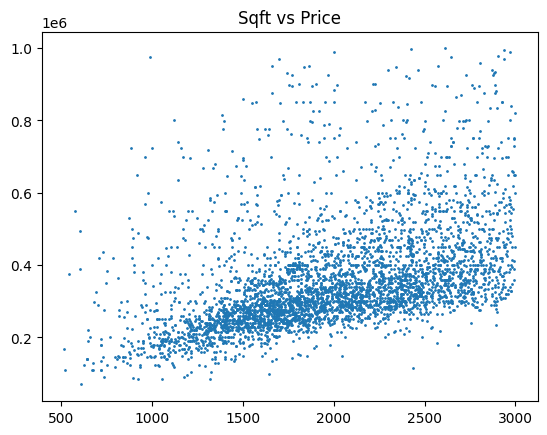

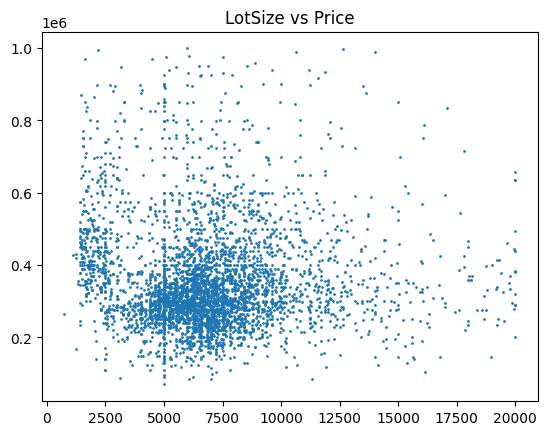

Number of data points included: 4300


In [9]:
plt.title("Sqft vs Price")
plt.scatter(data[:, squareFootage_i], data[:, price_i], s=1)
plt.show()
plt.title("LotSize vs Price")
plt.scatter(data[:, lotSize_i], data[:, price_i], s=1)
plt.show()
print("Number of data points included:", len(data))

# Run Mulitvar Gradient Descent

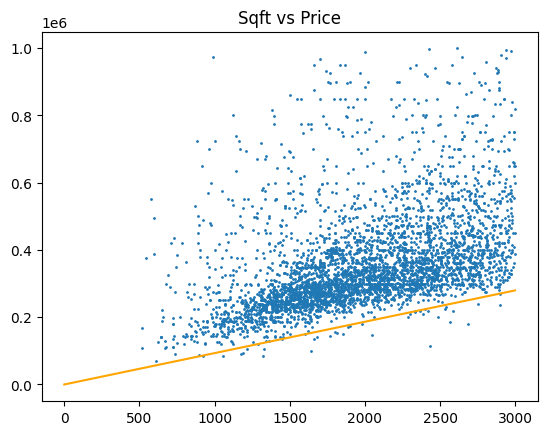

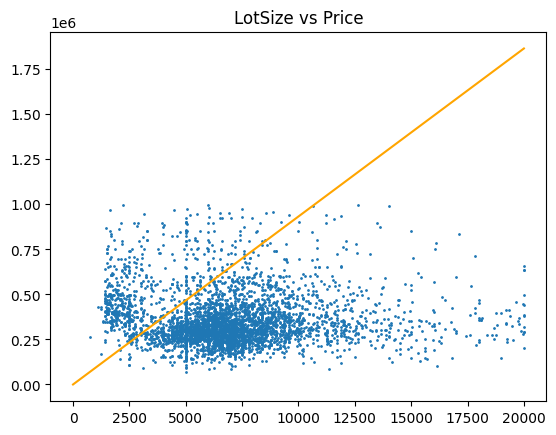

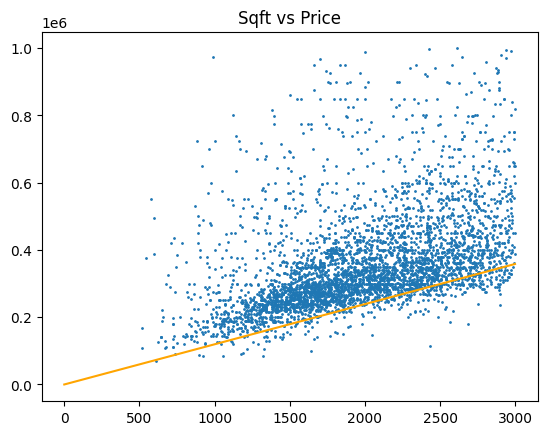

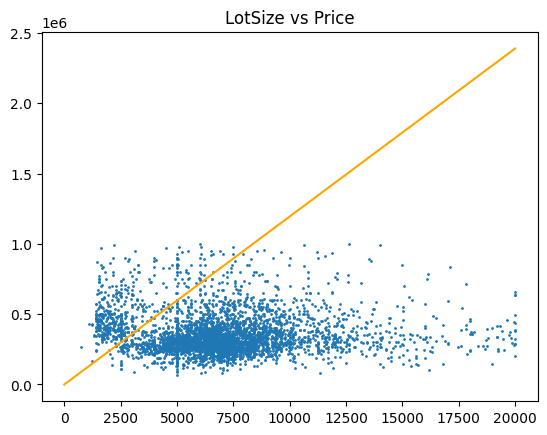

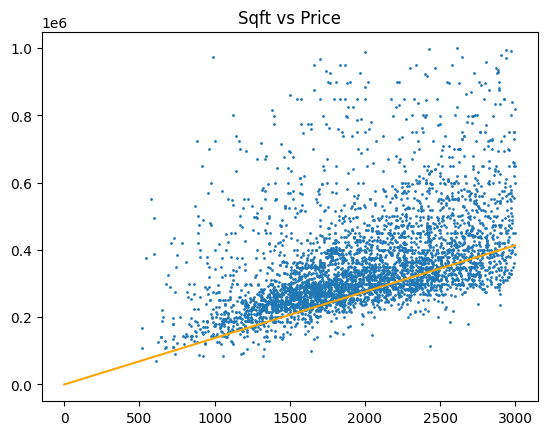

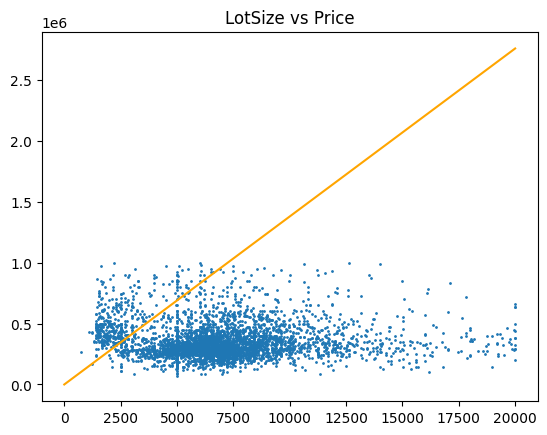

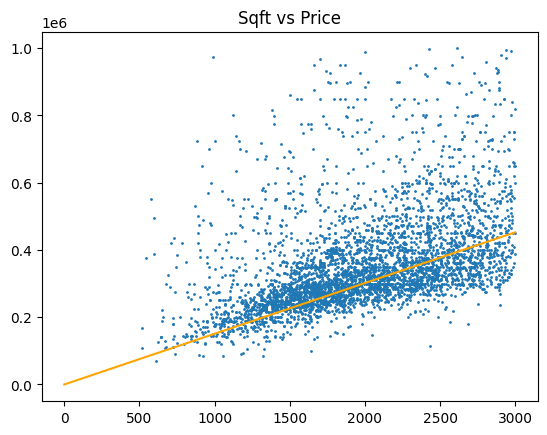

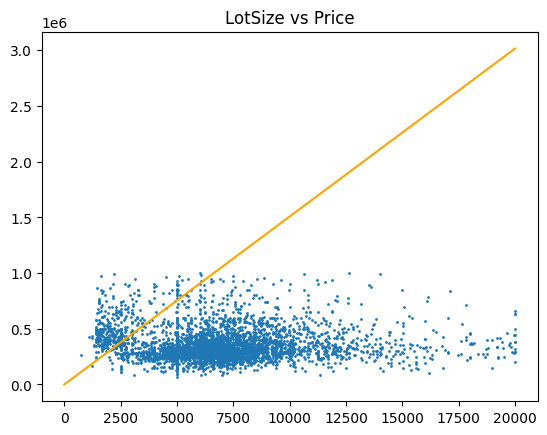

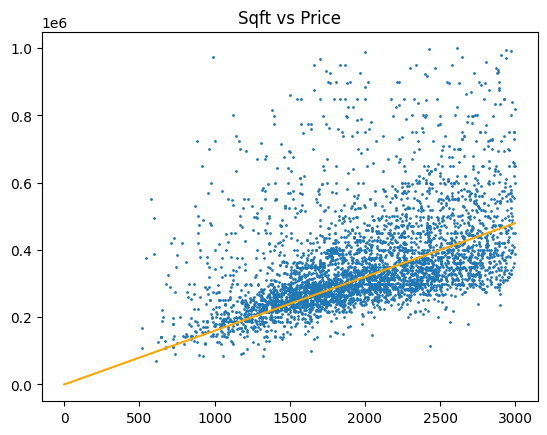

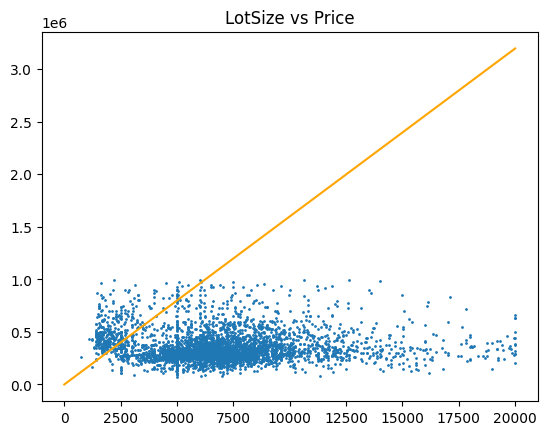

theta0=		 [0.07]
theta1 lotSize=	 [11.081]
theta2 sqft=	 [148.837]


In [13]:
def sgd(X, Y, training_rate=0.0000000001, iters=5):
    n_features = len(X[0])
    theta = np.zeros((n_features, 1))


    for _ in range(iters):
        for x, y in zip(X, Y):
            y_pred = theta.T @ x
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (y_pred - y) * x 
        # plot    
        lotSize_x = np.arange(0, np.amax(data[:, lotSize_i]))
        squareFootage_x = np.arange(0, np.amax(data[:, squareFootage_i]))
        
        plt.title("Sqft vs Price")
        plt.scatter(data[:, squareFootage_i], data[:, price_i], s=1)
        plt.plot(squareFootage_x, theta[2, 0] * squareFootage_x + theta[1, 0] * squareFootage_x + theta[0, 0], c='orange')
        plt.show()
        plt.title("LotSize vs Price")
        plt.scatter(data[:, lotSize_i], data[:, price_i], s=1)
        plt.plot(lotSize_x, theta[2, 0] * lotSize_x + theta[1, 0] * lotSize_x + theta[0, 0], c='orange')
        plt.show()


    return theta


filteredData = np.ones((len(data[:, 1]), 1))
filteredData = np.hstack((filteredData, np.array([data[:, lotSize_i]]).T)) # append lot size column
filteredData = np.hstack((filteredData, np.array([data[:, squareFootage_i]]).T)) # append square footage column

theta = sgd(filteredData, data[:, price_i])

print("theta0=\t\t", np.around(theta[0], decimals=3))
print("theta1 lotSize=\t", np.around(theta[1], decimals=3))
print("theta2 sqft=\t", np.around(theta[2], decimals=3))